Nesta aula iremos aplicar na prática os conceitos aprendidos sobre aprendizado de máquina.

**Etapas na criação de um modelo de Machine Learning**

<img src="https://media.licdn.com/dms/image/C4D12AQFmGBCoGMU8Fw/article-inline_image-shrink_1000_1488/0/1587488656783?e=1703116800&v=beta&t=SQOnCDxh0K4C5Qbef7JexkqBGomcJPJusHaYocAA3Zo" width="600">


**Scikit-Learn**

Para isso, iremos utilizar a biblioteca Scikit-Learn, que é uma das bibliotecas mais poderosas e completas para machine learning em Python. Ela também contém ferramentas simples e eficientes para a mineração de dados e análise de dados.

Para instalar o sklearn basta utilizar o comando: **pip install -U scikit-learn**

# Prevendo o preço de uma pizza de acordo com o seu diâmetro

Nossa objetivo é prever o preço de uma pizza com base em pizzas passadas que compramos. Como já dito anteriormente, para criar um modelo preditivo é preciso ter um conjunto de dados passados, então, os dados das pizzas que compramos em dias anteriores, será o nosso conjunto de dados. Observe:

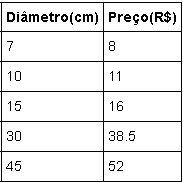

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Diâmetros (cm)
Diametros = np.array([7, 10, 15, 30, 45])

# Preços (R$)
Precos = np.array([8, 11, 16, 38.5, 52])

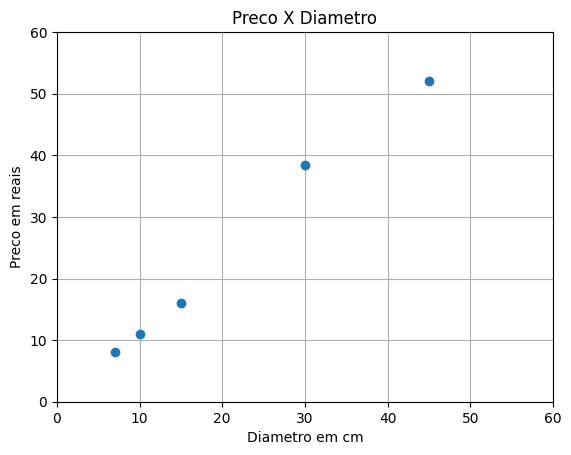

In [24]:
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.axis([0,60,0,60])
plt.grid()
plt.show()

In [92]:
from sklearn import linear_model

**Criando o modelo**

In [93]:
modelo_LR = linear_model.LinearRegression()

In [95]:
#Mudando o formato do array onde cada linha representa um exemplo
Diametros = np.reshape(Diametros,(-1,1))

**Treinamento do modelo (FIT)**

In [96]:
modelo_LR.fit(Diametros,Precos)

LinearRegression()

In [90]:
# teste = [[20]]
teste = np.array([20]).reshape(-1,1)

**Fazendo uma previsão (PREDICT)**

In [99]:
modelo_LR.predict(teste)

array([23.41409037])

### Prevendo os preços já conhecidos e entendendo como a previsão está sendo feita

In [107]:
# preços conhecidos
print(Diametros.reshape(1,-1))
print(Precos)

[[ 7 10 15 30 45]]
[ 8.  11.  16.  38.5 52. ]


In [108]:
# preços preditos
modelo_LR.predict(Diametros)

array([ 7.75921522, 11.37187872, 17.39298454, 35.45630202, 53.5196195 ])

In [106]:
# entendendo como a previsão está sendo feita
print('Equacao da reta ax + b')
print('a = ' + str(modelo_LR.coef_))
print('b = ' + str(modelo_LR.intercept_))

Equacao da reta ax + b
a = [1.20422117]
b = -0.6703329369797864


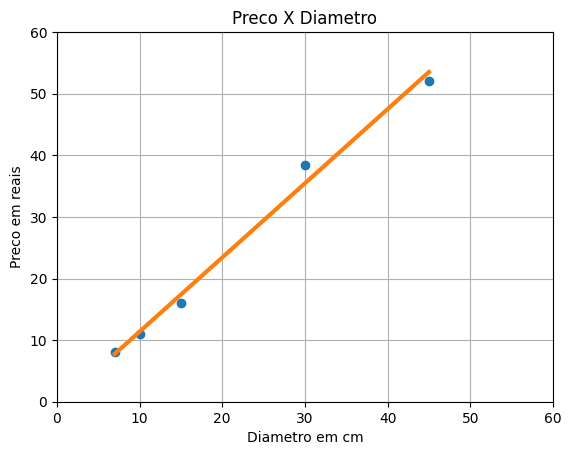

In [110]:
# Plotando os preços conhecidos x os preços preditos
# OBS: A Linha em laranja representa os valores preditos pelo modelo treinado
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.plot(Diametros,modelo_LR.predict(Diametros),linewidth=3)
plt.axis([0,60,0,60])
plt.grid()
plt.show()

**Avaliando nosso modelo**

Para avaliar nosso modelo podemos utilizar métricas de desempenho como por exemplo o **mean_squared_error (Erro Médio Quadrático)** que é uma métrica comumente usada para avaliar a qualidade de modelos de regressão em aprendizado de máquina pois quantifica o quão próximo as previsões de um modelo estão dos valores reais (ou alvos) em um conjunto de dados. Quanto menor o valor do erro médio quadrático, melhor o desempenho do modelo.

A fórmula do mean_squared_error é a seguinte:

mean_squared_error(y_true, y_pred) = (1/n) * Σ(y_true - y_pred)²

* y_true: São os valores reais do alvo no conjunto de dados.
* y_pred: São as previsões feitas pelo modelo.
* "Σ" indica a soma.
* "n" é o número total de exemplos no conjunto de dados.

A fórmula calcula a média dos quadrados das diferenças entre os valores reais (y_true) e as previsões do modelo (y_pred). Essa média de quadrados é uma medida da dispersão dos erros do modelo. Quanto menor for o valor, mais próximas as previsões estão dos valores reais, indicando um melhor desempenho do modelo.

In [130]:
from sklearn.metrics import mean_squared_error
print("Mean squared error:")
mean_squared_error(Precos,modelo_LR.predict(Diametros))

Mean squared error:


2.7420035671819223

**Coeficiente de Determinação (R²)**: O R² mede a proporção da variabilidade nos dados explicada pelo modelo. Um R² mais próximo de 1 indica que o modelo explica uma grande parte da variação nos dados.

In [131]:
from sklearn.metrics import r2_score
print("R2:")
r2_score(Precos,modelo_LR.predict(Diametros))

R2:


0.9907189156269228

# Treinando um modelo de regressão polinomial

Treinar um modelo de regressão polinomial envolve a criação de um modelo que pode capturar relações não lineares entre as variáveis independentes (características) e a variável de resposta (alvo).

In [140]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures é utilizado para transformar as características em características polinomiais. 
# Você define o grau do polinômio desejado, o que determinará quantos termos polinomiais serão gerados.
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(Diametros.reshape(-1,1))

# Criando e Treinando o modelo
modelo_polinomial = Ridge().fit(x_poly, Precos)

# Avaliando o desempenho do modelo
print("Mean squared error = ", mean_squared_error(Precos,modelo_polinomial.predict(x_poly)))

Mean squared error =  0.05653579272891064


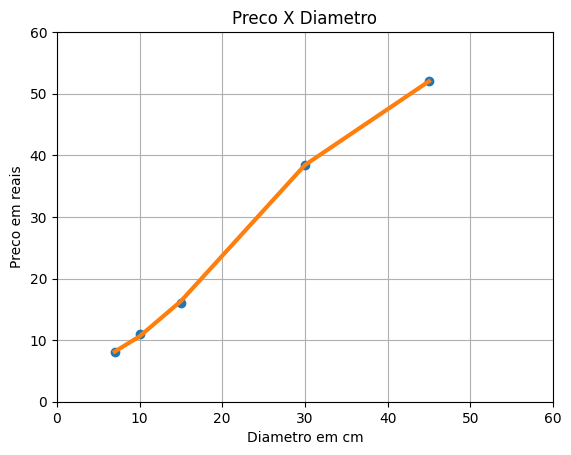

In [143]:
# Plotando uma comparação entre os preços conhecidos e preços previstos
plt.figure()
plt.xlabel('Diametro em cm')
plt.ylabel('Preco em reais')
plt.title('Preco X Diametro')
plt.plot(Diametros,Precos,'o')
plt.plot(Diametros,modelo_polinomial.predict(x_poly),linewidth=3)
plt.axis([0,60,0,60])
plt.grid()
plt.show()

### Utilizando o make_pipeline

In [145]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(Diametros, Precos)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [146]:
print("Mean squared error = ", mean_squared_error(Precos,modelo_polinomial.predict(Diametros)))

Mean squared error =  0.05653579272891064


# Regressão para a estimação do preço de casas utilizando o Dataset California Housing

In [151]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
# from sklearn.datasets import load_boston
# boston = load_boston()

In [228]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# boston = fetch_california_housing()

In [229]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [230]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [231]:
import pandas as pd

# Convertendo o dataset em um DataFrame pandas
atributos_casas = pd.DataFrame(housing.data)
atributos_casas.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [232]:
# Convertendo o título das colunas
atributos_casas.columns = housing.feature_names
atributos_casas.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [233]:
# Pegando os precos das casas
preco_casas = pd.DataFrame(housing.target)

# Utilizando o Linear Regression

In [234]:
modelo_linear_regression_casas = linear_model.LinearRegression()

In [235]:
modelo_linear_regression_casas.fit(atributos_casas,preco_casas)

LinearRegression()

In [239]:
print("Valor predito = ", modelo_linear_regression_casas.predict([atributos_casas.loc[3]]))
print("Preco real = ", preco_casas.loc[3][0])

Valor predito =  [[3.2415985]]
Preco real =  3.413


/home/rafael/Documentos/IFPI/2023.2/TOPICOS-ESPECIAIS-PROF/env/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [241]:
print("Mean squared error = ", mean_squared_error(preco_casas,modelo_linear_regression_casas.predict(atributos_casas)))

Mean squared error =  0.5243209861846072


# Utilizando o modelo de regressão polinomial

In [242]:
degree = 3

modelo_polinomial_casas = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial_casas.fit(atributos_casas, preco_casas)

/home/rafael/Documentos/IFPI/2023.2/TOPICOS-ESPECIAIS-PROF/env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.47605e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [243]:
print("Mean squared error = ", mean_squared_error(preco_casas,modelo_polinomial_casas.predict(atributos_casas)))

Mean squared error =  0.35129186657872974


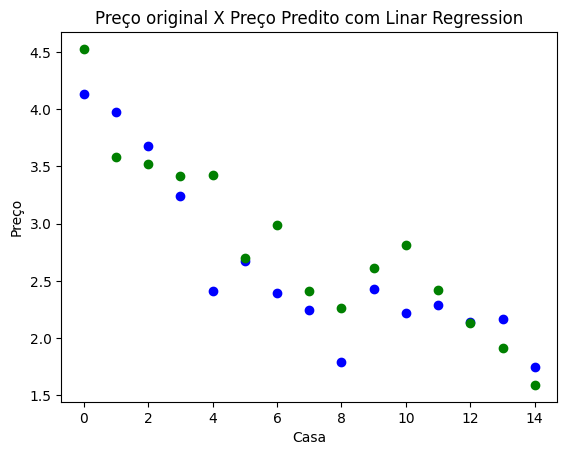

In [252]:
plt.title("Preço original X Preço Predito com Linar Regression")
plt.plot(modelo_linear_regression_casas.predict(atributos_casas[0:15]),'bo')
plt.plot(preco_casas[0:15],'go')
plt.ylabel('Preço')
plt.xlabel('Casa')
plt.show()

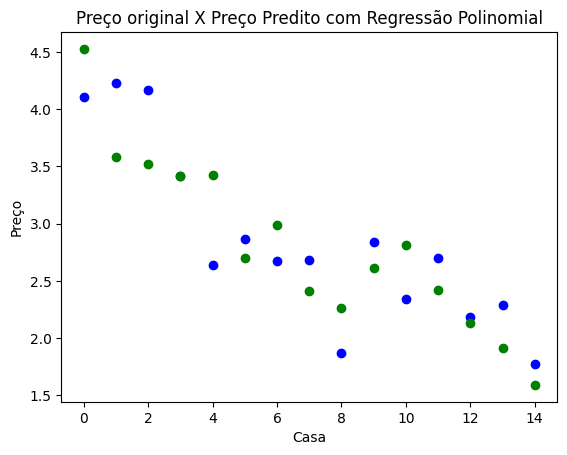

In [250]:
plt.title("Preço original X Preço Predito com Regressão Polinomial")
plt.plot(modelo_polinomial_casas.predict(atributos_casas[0:15]),'bo')
plt.plot(preco_casas[0:15],'go')
plt.ylabel('Preço')
plt.xlabel('Casa')
plt.show()